<a href="https://colab.research.google.com/github/Dineshkumar1823/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [4]:
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df =  pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone project Global terrorisum/Global Terrorism Data.csv",encoding='ISO-8859-1')

In [13]:
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,state,city,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,...,weapsubtype4,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [14]:
df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

There are to many columns, I didn't count them yet. But important things are the columns. Therefore we should look the columns

In [15]:
df.shape

(181691, 135)

In [16]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

Renaming the Column Names

In [17]:
df.head()


,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,state,city,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,...,weapsubtype4,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [19]:
df.describe()

,eventid,Year,Month,Day,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.0000

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [24]:
thresh = len(df) * .6
df.dropna(thresh = thresh, axis = 1, inplace = True)

Here Dropping the NULL values for More than 60% in the particulare column of the dataset

In [86]:
df.head()

,eventid,Year,Month,Day,extended,country,Country,region,Region,state,city,latitude,longitude,specificity,vicinity,Summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,AttackType,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,Group,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,-99.0,0.0,0.0,13,Unknown,12.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,PGIS,0,0,0,0
1,1.970000e+11,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,0.0,0.0,13,Unknown,12.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,NaN,PGIS,0,1,1,1
2,1.970010e+11,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,-99.0,0.0,0.0,13,Unknown,12.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,PGIS,-9,-9,1,1
3,1.970010e+11,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,1,1
4,1.970010e+11,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,-99.0,0.0,0.0,8,Incendiary,12.0,NaN,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,1,1


In [26]:
df.shape

(181691, 58)

In [27]:
df.isnull().sum()

eventid                 0
Year                    0
Month                   0
Day                     0
extended                0
country                 0
Country                 0
region                  0
Region                  0
state                 421
city                  434
latitude             4556
longitude            4557
specificity             6
vicinity                0
Summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
AttackType              0
targtype1               0
Target_type             0
targsubtype1        10373
targsubtype1_txt    10373
corp1               42550
Target                636
natlty1              1559
natlty1_txt          1559
Group                   0
guncertain1           380
individual              0
nperps              71115
nperpcap            69489
claimed     

In [43]:
int_cols=df.select_dtypes(include=np.number).columns.tolist()
int_cols

['eventid',
 'Year',
 'Month',
 'Day',
 'extended',
 'country',
 'region',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'targtype1',
 'targsubtype1',
 'natlty1',
 'guncertain1',
 'individual',
 'nperps',
 'nperpcap',
 'claimed',
 'weaptype1',
 'weapsubtype1',
 'Killed',
 'nkillus',
 'nkillter',
 'Wounded',
 'nwoundus',
 'nwoundte',
 'property',
 'ishostkid',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

In [44]:
for i in int_cols:
  df[i] = df[i].fillna(df[i].median())

In [46]:
df.isnull().sum()

eventid                 0
Year                    0
Month                   0
Day                     0
extended                0
country                 0
Country                 0
region                  0
Region                  0
state                 421
city                  434
latitude                0
longitude               0
specificity             0
vicinity                0
Summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               0
multiple                0
success                 0
suicide                 0
attacktype1             0
AttackType              0
targtype1               0
Target_type             0
targsubtype1            0
targsubtype1_txt    10373
corp1               42550
Target                636
natlty1                 0
natlty1_txt          1559
Group                   0
guncertain1             0
individual              0
nperps                  0
nperpcap                0
claimed     

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 58 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  float64
 1   Year              181691 non-null  int64  
 2   Month             181691 non-null  int64  
 3   Day               181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   Country           181691 non-null  object 
 7   region            181691 non-null  int64  
 8   Region            181691 non-null  object 
 9   state             181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          181691 non-null  float64
 12  longitude         181691 non-null  float64
 13  specificity       181691 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  Summary           115562 non-null  object 
 16  crit1             18

In [48]:
df.drop_duplicates()

,eventid,Year,Month,Day,extended,country,Country,region,Region,state,city,latitude,longitude,specificity,vicinity,Summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,AttackType,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,Group,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,-99.0,0.0,0.0,13,Unknown,12.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,PGIS,0,0,0,0
1,1.970000e+11,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,0.0,0.0,13,Unknown,12.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,NaN,PGIS,0,1,1,1
2,1.970010e+11,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,-99.0,0.0,0.0,13,Unknown,12.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,PGIS,-9,-9,1,1
3,1.970010e+11,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,1,1
4,1.970010e+11,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,-99.0,0.0,0.0,8,Incendiary,12.0,NaN,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,0.0,1,0,2,Armed Assault,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,Al-Shabaab,0.0,0,-99.0,0.0,1.0,5,Firearms,5.0,Unknown Gun Type,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,0.0,"""Somalia: Al-Shabaab Militants Attack Army Che...",START Primary Collection,0,0,0,0
181687,2.017120e+11,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,Muslim extremists,0.0,0,-99.0,0.0,0.0,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,0.0,"""Putin's 'victory' in Syria has turned into a ...",START Primary Collection,-9,-9,1,1
181688,2.017120e+11,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0,-99.0,0.0,0.0,8,Incend

In [49]:

df.shape

(181691, 58)

There is No duplicate Found in the dataset

In [50]:
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [51]:
df['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

## **DATA** **VISULIASATION**

**Number of Terrorist Activites Each Year**

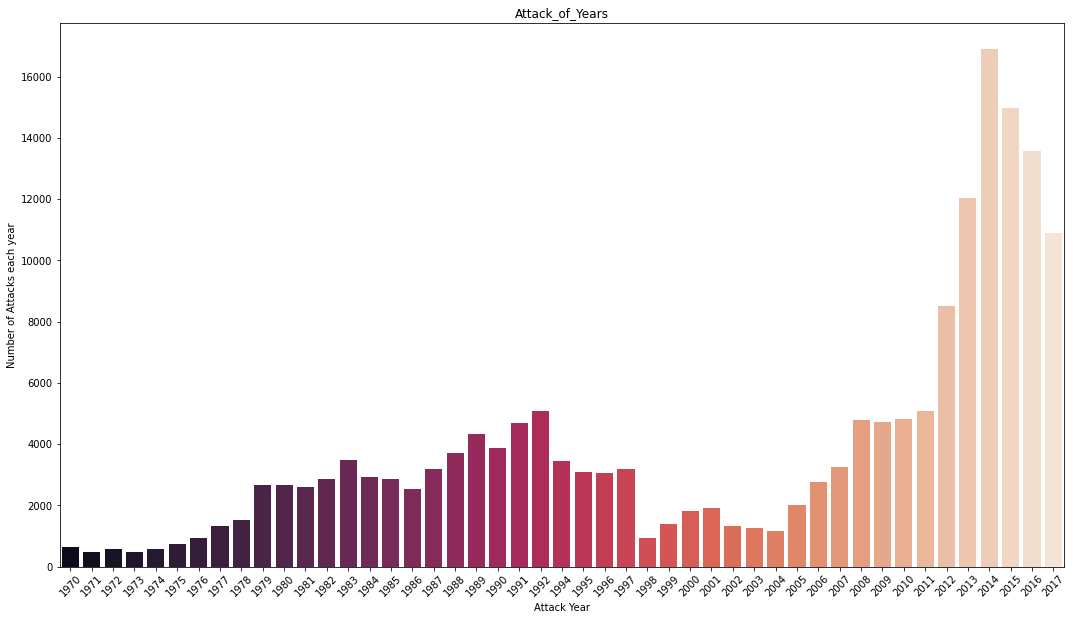

In [52]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()



Its shows clearly 2014 Most Terror Attack Happened

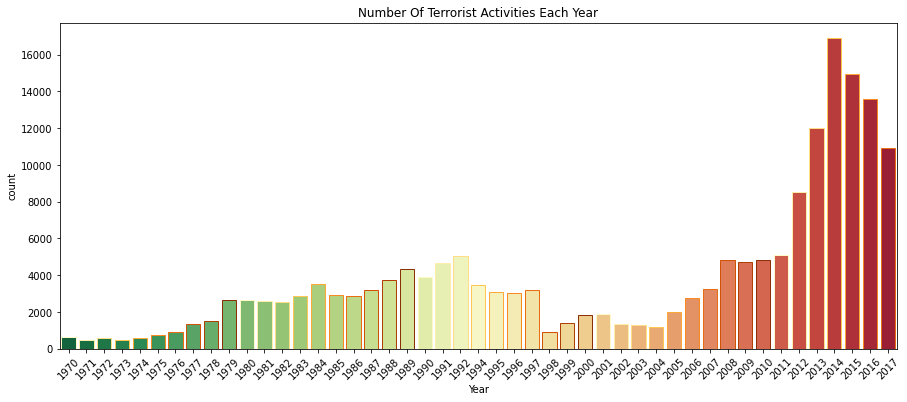

In [53]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

**FIND OUT WHICH MONTH ATTACKS MORE  **

Text(0.5, 1.0, 'Month wise attacks')

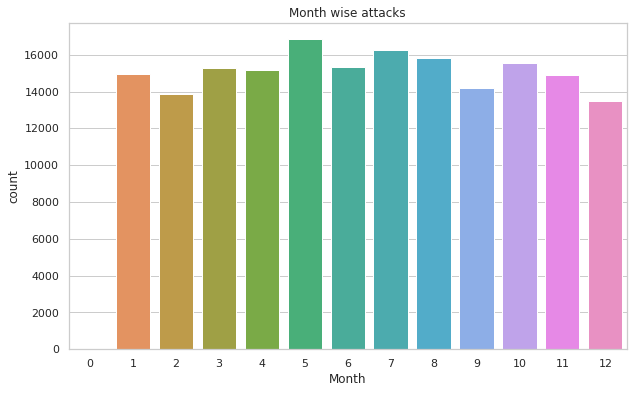

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(df['Month']).set_title('Month wise attacks')

In [57]:
df[df['Month']==0]

,eventid,Year,Month,Day,extended,country,Country,region,Region,state,city,latitude,longitude,specificity,vicinity,Summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,AttackType,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,Group,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
1,1.970000e+11,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,0.0,0.0,13,Unknown,12.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,NaN,PGIS,0,1,1,1
1123,1.972000e+11,1972,0,0,0,160,Philippines,5,Southeast Asia,Capiz,Roxas,11.586558,122.753716,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,air manila fokker F-27p,160.0,Philippines,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,7.0,Grenade,Explosive; Grenade,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,0,-9
1690,1.973000e+11,1973,0,0,1,45,Colombia,3,South America,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),1,Business,9.0,Farm/Ranch,NaN,"Alirio Serrano Sanchez, rancher",45.0,Colombia,National Liberation Army of Colombia (ELN),0.0,0,-99.0,0.0,0.0,13,Unknown,12.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,NaN,PGIS,0,0,0,0
2164,1.974000e+11,1974,0,0,0,69,France,8,Western Europe,Paris,Paris,48.856644,2.342330,1.0,0,NaN,1,1,1,-9.0,0.0,0,0,3,Bombing/Explosion,1,Business,3.0,Bank/Commerce,NaN,Bank Lazard,69.0,France,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,28.0,Dynamite/TNT,Dynamite,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,0,-9
2165,1.974000e+11,1974,0,0,0,98,Italy,8,Western Europe,Lazio,Rome,41.890961,12.490069,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,TWA Boeing 707,217.0,United States,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,1,1
2744,1.975000e+11,1975,0,0,0,153,Pakistan,6,South Asia,Punjab,Rawalpindi,33.594013,73.069077,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,Pakistan Airlines Boeing 707,153.0,Pakistan,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,0,-9
3484,1.976000e+11,1976,0,0,0,209,Turkey,10,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1.0,0,NaN,1,1,0,1.0,0.0,1,0,9,Unknown,4,Military,35.0,Military Transportation/Vehicle (excluding con...,NaN,Turkish Army Vehicle,209.0,Turkey,Armenian Secret Army for the Liberation of Arm...,0.0,0,-99.0,0.0,0.0,13,Unknown,12.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,Hyland,0,1,0,1
3485,1.976000e+11,1976,0,0,0,209,Turkey,10,Middle East & North Africa,Ankara,Ankara,39.930771,32.767540,1.0,0,NaN,1,1,0,1.0,0.0,1,0,9,Unknown,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,NaN,military base,209.0,Turkey,Armenian Secret Army for the Liberation of Arm...,0.0,0,-99.0,0.0,0.0,13,Unknown,12.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,Hyland,0,1,0,1
4407,1.977000e+11,1977,0,0,0,101,Japan,4,East Asia,Tokyo,Tokyo,35.689125,139.747742,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,8,Educational Institution,49.0,School/University/Educational Building,NaN,Tokyo University,101.0,Japan,Tribal Battlefront,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,0,0,0,0
4408,1.977000e+11,1977,0,0,0,101,Japan,4,East Asia,Tokyo,Tokyo,35.689125,139.747742,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,1,Busines

In [58]:
country_wise=df['Country'].value_counts().reset_index()
print(country_wise) 

                   index  Country
0                   Iraq    24636
1               Pakistan    14368
2            Afghanistan    12731
3                  India    11960
4               Colombia     8306
..                   ...      ...
200        International        1
201    Wallis and Futuna        1
202        South Vietnam        1
203              Andorra        1
204  Antigua and Barbuda        1

[205 rows x 2 columns]


In [61]:
country_wise=df['Country'].value_counts().reset_index()
country_wise.rename(columns={"index":'Country Name','Country':'Count'},inplace=True)
country_wise

,Country Name,Count
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
...,...,...
200,International,1
201,Wallis and Futuna,1
202,South Vietnam,1
203,Andorra,1


**TOP COUNTRIRES AFFECTED BY THIS TERRORIST ATTACK**

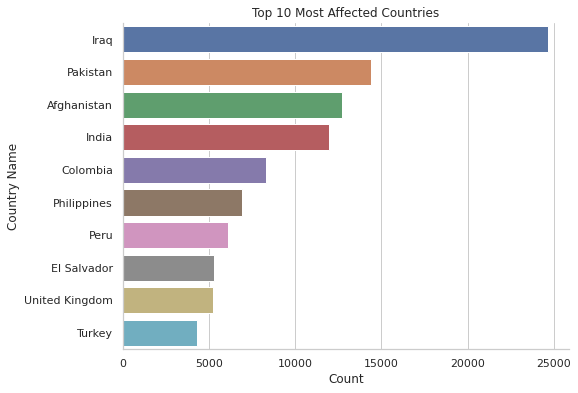

In [62]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8,6))
# sns.set_color_codes("muted")
sns.color_palette("pastel") # Set2 , ("husl", 9), ("flare", as_cmap=True)"pastel"
sns.barplot(x="Count", y="Country Name", data=country_wise[:10])
plt.title('Top 10 Most Affected Countries')
# plt.xlabel(' ')
# plt.ylabel('')
sns.despine()
plt.show()

In [63]:
region_wise=df['Region'].value_counts().reset_index()
region_wise.rename(columns={"index":'Region Name','Region':'Count'},inplace=True)
region_wise

,Region Name,Count
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639
5,Southeast Asia,12485
6,Central America & Caribbean,10344
7,Eastern Europe,5144
8,North America,3456
9,East Asia,802


**REGION WISE ATTACKS**

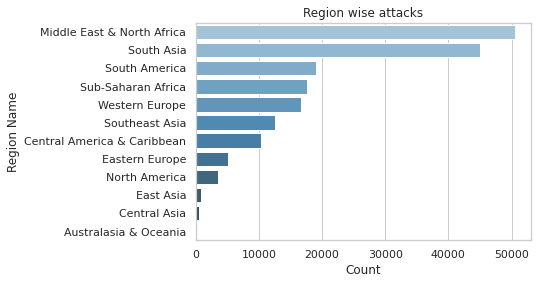

In [65]:
ax = sns.barplot(x="Count", y="Region Name", data=region_wise,
                 palette="Blues_d").set_title('Region wise attacks')

**Terrorist Activities by Region in each Year through Area Plot**

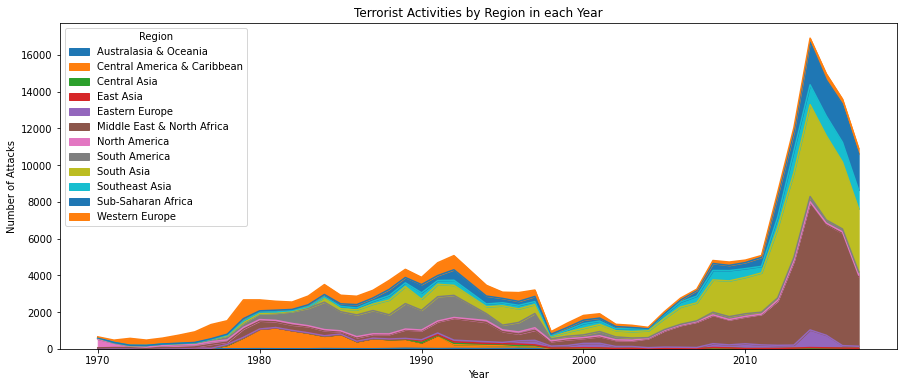

In [54]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

**CITY WISE ATTACK **

In [66]:
city_wise=df['city'].value_counts().reset_index()
city_wise.rename(columns={"index":'City Name','city':'Count'},inplace=True)
city_wise

,City Name,Count
0,Unknown,9775
1,Baghdad,7589
2,Karachi,2652
3,Lima,2359
4,Mosul,2265
...,...,...
36669,Hotwag,1
36670,Ostend,1
36671,Balughata,1
36672,Jikoyi,1


In [67]:
df.city=='unknown'

0         False
1         False
2         False
3         False
4         False
          ...  
181686    False
181687    False
181688    False
181689    False
181690    False
Name: city, Length: 181691, dtype: bool

In [68]:
df[df.city=="unknown"]

,eventid,Year,Month,Day,extended,country,Country,region,Region,state,city,latitude,longitude,specificity,vicinity,Summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,AttackType,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,Group,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
1690,1.973000e+11,1973,0,0,1,45,Colombia,3,South America,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),1,Business,9.0,Farm/Ranch,NaN,"Alirio Serrano Sanchez, rancher",45.0,Colombia,National Liberation Army of Colombia (ELN),0.0,0,-99.0,0.0,0.0,13,Unknown,12.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,NaN,PGIS,0,0,0,0
7537,1.979020e+11,1979,2,3,0,145,Nicaragua,2,Central America & Caribbean,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,-9.0,0.0,1,0,6,Hostage Taking (Kidnapping),1,Business,9.0,Farm/Ranch,independent business,"Juan Bautista Espinales, farmer",145.0,Nicaragua,Unknown,0.0,0,-99.0,0.0,0.0,13,Unknown,12.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,NaN,PGIS,-9,-9,0,-9
7668,1.979020e+11,1979,2,19,0,209,Turkey,10,Middle East & North Africa,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,NaN,Political Assoc,209.0,Turkey,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,0,-9
7669,1.979020e+11,1979,2,19,0,209,Turkey,10,Middle East & North Africa,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,NaN,Political Association,209.0,Turkey,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,0,-9
7671,1.979020e+11,1979,2,19,0,209,Turkey,10,Middle East & North Africa,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,NaN,Political Assoc,209.0,Turkey,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,0,-9
7672,1.979020e+11,1979,2,19,0,209,Turkey,10,Middle East & North Africa,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,NaN,political assoc,209.0,Turkey,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,0,-9
7673,1.979020e+11,1979,2,19,0,209,Turkey,10,Middle East & North Africa,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,NaN,Political Association,209.0,Turkey,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,0,-9
7674,1.979020e+11,1979,2,19,0,209,Turkey,10,Middle East & North Africa,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,NaN,Political Assoc,209.0,Turkey,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,0,-9
7675,1.979020e+11,1979,2,19,0,209,Turkey,10,Middle East & North Africa,Unknown,unknown,31.467463,43.246506,5.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,NaN,political assoc,209.0,Turkey,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1

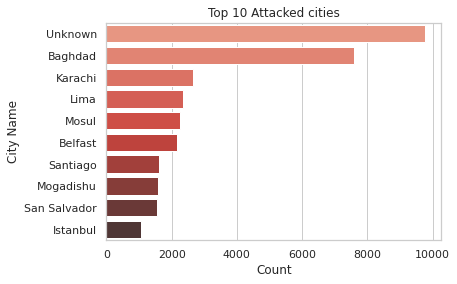

In [69]:
ax = sns.barplot(x="Count", y="City Name", data=city_wise[:10],
                 palette="Reds_d").set_title('Top 10 Attacked cities')

**MOST TYPE OF ATTACK ARE IMPLEMENTED IN THIS OVERALL ATTCK**

In [70]:
attack_type =df['AttackType'].value_counts().reset_index()
attack_type.rename(columns={"index":"Attack type","AttackType" : "Count"},inplace = True)
attack_type

,Attack type,Count
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356
5,Unknown,7276
6,Unarmed Assault,1015
7,Hostage Taking (Barricade Incident),991
8,Hijacking,659


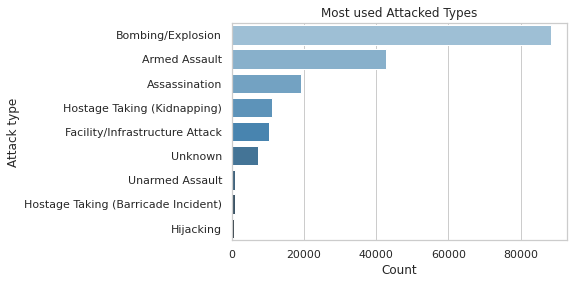

In [71]:
ax = sns.barplot(x="Count", y="Attack type", data=attack_type,
                 palette="Blues_d").set_title('Most used Attacked Types')

**FIND OUT THE MOST TARGETED AND AFFECTED CATERGORY GROUP OF PEOPLE IN THOSE ATTACKS**

In [75]:
targeted_people = df["Target_type"].value_counts().reset_index()
targeted_people.rename(columns={"index":"tareged_person","Target_type": "Count"}, inplace= True)
targeted_people[:10]

,tareged_person,Count
0,Private Citizens & Property,43511
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669
5,Transportation,6799
6,Utilities,6023
7,Unknown,5898
8,Religious Figures/Institutions,4440
9,Educational Institution,4322


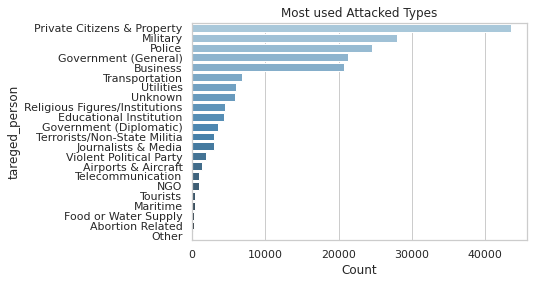

In [82]:
ax = sns.barplot(x="Count", y="tareged_person", data=targeted_people,
                 palette="Blues_d").set_title('Most used Attacked Types')

**TOP 10 NATIONALITY AFFECTED IN THIS ATTACKS**

In [83]:
nationality_type=df['natlty1_txt'].value_counts().reset_index()
nationality_type.rename(columns={"index":'Target Nationality','natlty1_txt':'Count'},inplace=True)
nationality_type

,Target Nationality,Count
0,Iraq,24113
1,Pakistan,13900
2,India,12098
3,Afghanistan,10931
4,Colombia,7922
...,...,...
210,People's Republic of the Congo,1
211,Saba (Netherlands Antilles),1
212,Tuvalu,1
213,Western Sahara,1


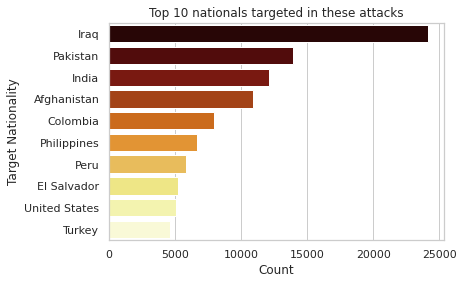

In [84]:
ax = sns.barplot(x="Count", y="Target Nationality", data=nationality_type[:10],
                 palette="afmhot").set_title('Top 10 nationals targeted in these attacks')

**Most ATTACKED WEAPON TYPE**

In [87]:
weapon_name=df['Weapon_type'].value_counts().reset_index()
weapon_name.rename(columns={"index":'Weapons','Weapon_type':'Count'},inplace=True)
weapon_name

,Weapons,Count
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655
5,Chemical,321
6,Sabotage Equipment,141
7,Vehicle (not to include vehicle-borne explosiv...,136
8,Other,114
9,Biological,35


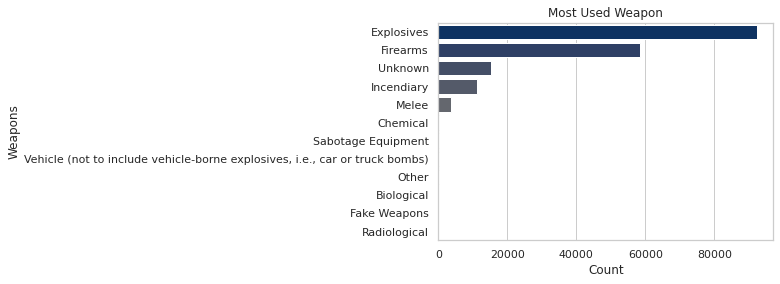

In [88]:
ax = sns.barplot(x="Count", y="Weapons", data=weapon_name,
                 palette="cividis").set_title('Most Used Weapon')

In [ ]:
Weapon_type